# Getting started

## Installation

If you don't have Anaconda (or if you don't know what Anaconda is) installed, follow these steps.

1) Download and install miniconda [here](https://conda.io/miniconda.html)
2) Open `terminal` and run the following commands

``
conda install numpy scipy matplotlib
conda install pandas
conda install jupyter
conda install statsmodels
``

3) Run the command `jupyter notebook`.

In Jupyter Notebook, create a new Python 3 notebook. This should bring you to a screen similar to this one. Here you can quickly test code in a presentable format.

Note: technically some of these packages aren't necessary (like `statsmodels`), but they help a lot.

In [1]:
import pandas as pd # <-- Primary tool for data manipulation
import numpy as np  # <-- Linear algebra library
import statsmodels.api as sm  # <-- Statistical tests
import matplotlib.pyplot as plt  # <-- Plotting tool

# Shows plots inline
%matplotlib inline 

In [2]:
# Load table
# df stands for DataFrame
df = pd.read_excel('/home/anthony/Downloads/SomeTimes.xlsx',
                   sheet_name='2013', header=None)

# Display the first 10 entries of the table
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.012987,1.0,"Loxsom, Casimir",SR-4,Penn State,00:01:46.770000,55th Mt. SAC Relays,2013-04-18,NaN,NaN,...,2013-04-28,NaN,NaN,1.0,"Mickow, Hunter",SR-4,Illinois,00:29:20.450000,55th Mt. SAC Relays,2013-04-18
2,0.025974,2.0,"Kidder, Brannon",FR-1,Penn State,00:01:47.230000,55th Mt. SAC Relays,2013-04-18,NaN,NaN,...,2013-04-18,NaN,NaN,2.0,"Darling, Maverick",SR-4,Wisconsin,00:29:25.110000,Big Ten Outdoor Conference Championships,2013-05-10
3,0.038961,3.0,"Burkstrand, Travis",SR-4,Minnesota,00:01:47.560000,Big Ten Outdoor Conference Championships,2013-05-10,NaN,NaN,...,2013-03-29,NaN,NaN,3.0,"Mayhew, Zachary",SR-4,Indiana,00:29:28.360000,Big Ten Outdoor Conference Championships,2013-05-10
4,0.051948,4.0,"Abda, Harun",SR-4,Minnesota,00:01:47.600000,NCAA Division I National Championships,2013-06-05,NaN,NaN,...,2013-03-29,NaN,NaN,4.0,"Riddle, Jim",SR-4,Illinois,00:29:28.410000,55th Mt. SAC Relays,2013-04-18
5,0.064935,5.0,"Mudd, Austin",SO-2,Wisconsin,00:01:48.470000,Big Ten Outdoor Conference Championships,2013-05-10,NaN,NaN,...,2013-04-28,NaN,NaN,5.0,"Allen, Cale",SR-4,Purdue,00:29:33.680000,Stanford Invitational,2013-03-29
6,0.077922,6.0,"West, Ricky",SR-4,Penn State,00:01:48.490000,55th Mt. SAC Relays,2013-04-18,NaN,NaN,...,2013-04-18,NaN,NaN,6.0,"Connor, Reed",JR-3,Wisconsin,00:29:33.880000,Stanford Invitational,2013-03-29
7,0.090909,7.0,"Lynn, Ryan",SR-4,Illinois,00:01:48.870000,Big Ten Outdoor Conference Championships,2013-05-10,NaN,NaN,...,2013-06-05,NaN,NaN,7.0,"Krause, Elliot",SR-4,Wisconsin,00:29:35.170000,Big Ten Outdoor Conference Championships,2013-05-10
8,0.103896,8.0,"Creese, Robby",SO-2,Penn State,00:01:48.980000,Crimson Tide Invitational,2013-04-06,NaN,NaN,...,2013-04-18,NaN,NaN,8.0,"Beams, Mark",JR-3,Michigan,00:29:36.490000,55th Mt. SAC Relays,2013-04-18
9,0.116883,9.0,"Banyai, Joe",SR-4,Michigan State,00:01:49.250000,Big Ten Outdoor Conference Championships,2013-05-10,NaN,NaN,...,2013-03-29,NaN,NaN,9.0,"McClintock, Matt",FR-1,Purdue,00:29:37.890000,Big Ten Outdoor Conference Championships,2013-05-10


In [3]:
# Let's rename some of the columns
df.rename(columns={2: 'name', 3: 'year', 5: 'time'}, inplace=True)

# Access a particular column
df['name'].head(10)

0                   NaN
1       Loxsom, Casimir
2       Kidder, Brannon
3    Burkstrand, Travis
4           Abda, Harun
5          Mudd, Austin
6           West, Ricky
7            Lynn, Ryan
8         Creese, Robby
9           Banyai, Joe
Name: name, dtype: object

In [4]:
# Access multiple columns at once
df[['name', 'time']].head(10)

,name,time
0,NaN,NaN
1,"Loxsom, Casimir",00:01:46.770000
2,"Kidder, Brannon",00:01:47.230000
3,"Burkstrand, Travis",00:01:47.560000
4,"Abda, Harun",00:01:47.600000
5,"Mudd, Austin",00:01:48.470000
6,"West, Ricky",00:01:48.490000
7,"Lynn, Ryan",00:01:48.870000
8,"Creese, Robby",00:01:48.980000
9,"Banyai, Joe",00:01:49.250000


In [5]:
# See columns and column types
# Only looking at first 10 entries for convenience
print(df.dtypes[:10])

0              float64
1              float64
name            object
year            object
4               object
time            object
6               object
7       datetime64[ns]
8              float64
9              float64
dtype: object


In [6]:
# Create a new column, convert the year to a number
df['year_num'] = df['year'].str[3:].astype(float)

# Convert time to a number. Hacky but it works
df['mins'] = df['time'].astype(str).str[4:5].replace('', np.nan).astype(float)
df['secs'] = df['time'].astype(str).str[6:].replace('', np.nan).astype(float)
df['time_num'] = 60 * df['mins'] + df['secs']


df[['year_num', 'time_num']].head(10)

,year_num,time_num
0,NaN,NaN
1,4.0,106.77
2,1.0,107.23
3,4.0,107.56
4,4.0,107.60
5,2.0,108.47
6,4.0,108.49
7,4.0,108.87
8,2.0,108.98
9,4.0,109.25


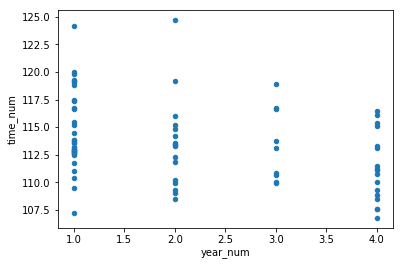

In [7]:
# Plot a scatter plot
df.plot.scatter('year_num', 'time_num')
plt.show()

In [8]:
# Clean the table
df_clean = df[['year_num', 'time_num']].dropna()

# Do some correlations
X = df_clean['year_num']
X = sm.add_constant(X)
y = df_clean['time_num']

model = sm.OLS(y, X)  # <-- Ordinary least squares, aka linear regression
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               time_num   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     9.817
Date:                Sun, 05 Aug 2018   Prob (F-statistic):            0.00247
Time:                        14:53:05   Log-Likelihood:                -205.00
No. Observations:                  77   AIC:                             414.0
Df Residuals:                      75   BIC:                             418.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.7465      0.814    142.109      0.000     114.124     117.369
year_num      -1.0498      0.335     -3.133      0.002      -1.717      -0.382
==============================================================================
Omnibus:                        7.334   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.738
Skew:                           0.690   Prob(JB):                       0.0344
Kurtosis:                       3.445   Cond. No.                         5.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----

That's the basics. 

Ideally when you set up spreadsheets, you'll have them in a csv like format to make things easier. That means the first row will have columns headers and all other rows will have data. Only one table per sheet. Alternatively, you can add a third column called `event` and put the name of each event in there. Then you can use SQL-like filters to remove those rows.

A more comprehensive intro is available [here](https://pandas.pydata.org/pandas-docs/stable/10min.html). In general, `pandas` has good documentation and runs at a comparable speed (sometimes faster) to SQL. I've done manipulations with about a million rows and it usually only takes a couple seconds.

Some other useful libraries

- `scikit-learn` - basic machine learning toolkit
- `seaborn` - very pretty plots, makes plotting easier
- [This tutorial](https://realpython.com/python-web-scraping-practical-introduction/) on webscraping, seems easy enough

Try to do most of your programming in text documents, then test in Jupyter Notebooks. These get messy quickly.